# Importing the libraries and dataset

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

In [45]:
#before features selection
dataset = pd.read_csv('kredit.csv')
X = dataset[['laufkont', 'laufzeit', 'moral','verw', 'hoehe','sparkont','beszeit','rate','famges','buerge','wohnzeit','verm','alter','weitkred','wohn','bishkred','beruf','pers','telef','gastarb']]
y = dataset['kredit']

# Features selection

# Chi quadrat

In [64]:
#apply SelectKBest class to extract top 10 best features


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs         Score
4      hoehe  58264.415475
1   laufzeit    321.030795
0   laufkont     75.474269
5   sparkont     37.937451
12     alter     30.178268
2      moral     24.103752
11      verm      9.503534
6    beszeit      5.799899
13  weitkred      2.243436
7       rate      2.204619


# Feature importance

[0.12256386 0.0811333  0.06065849 0.0586019  0.07944394 0.05153332
 0.05646308 0.05194037 0.04508627 0.02648548 0.04838549 0.05205123
 0.06662129 0.02861946 0.03451654 0.03188449 0.0434698  0.022215
 0.03007749 0.00824918]


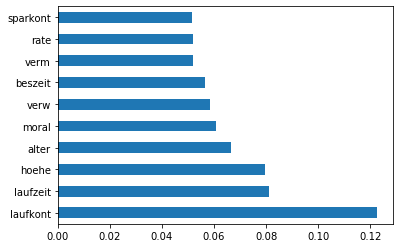

In [65]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Correlation matrix with heatmap

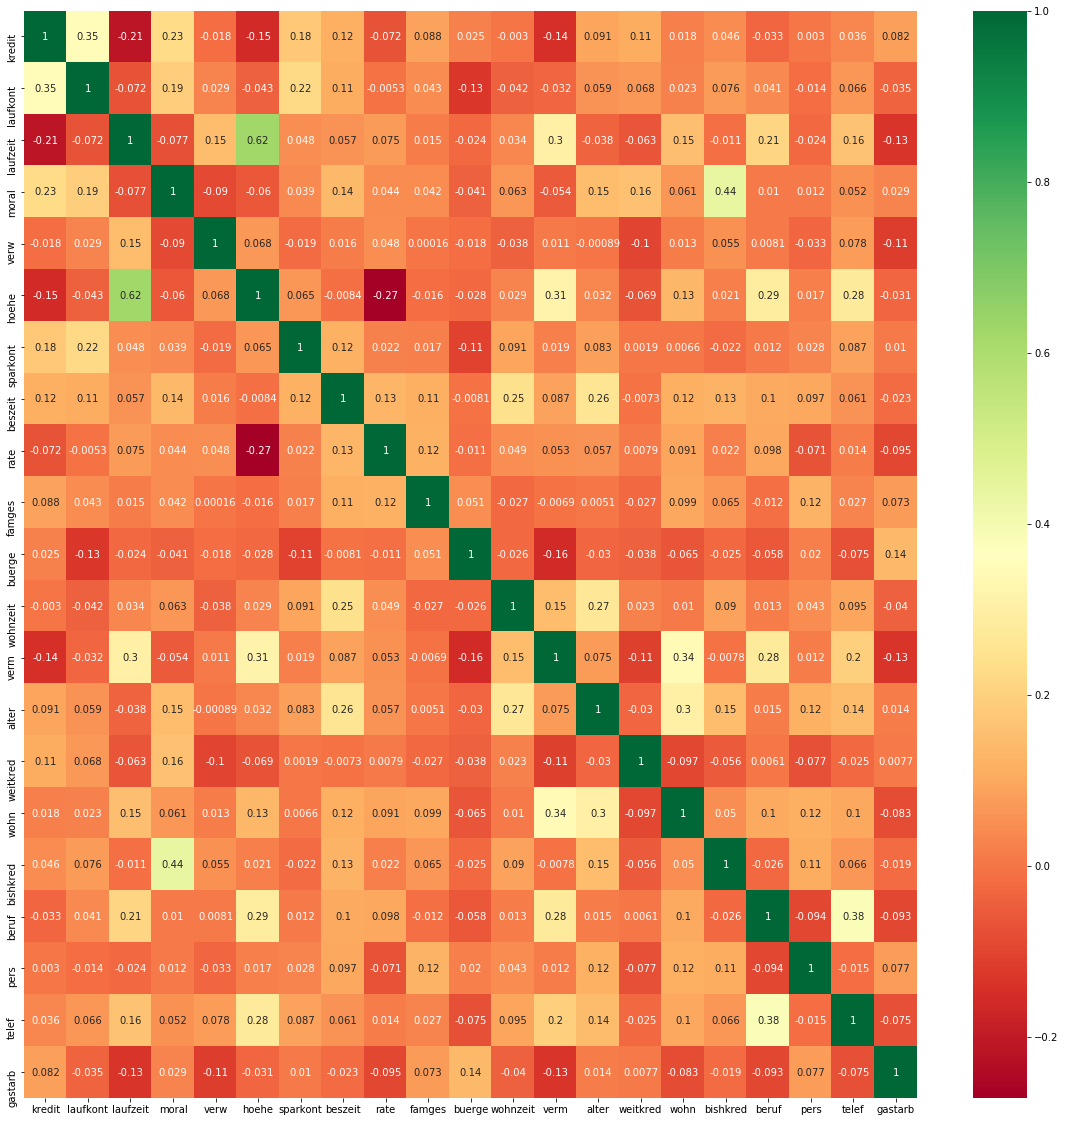

In [70]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Splitting the dataset into the training set and test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [47]:
print(X_train)

     laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
253         4        36      2     3   3595         1        5     4       3   
667         2        13      4     3    882         1        2     4       3   
85          1        12      2     0   3651         4        3     1       3   
969         1        21      1     0   1647         5        3     4       3   
75          2         9      2     2   2030         5        4     2       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
835         2        24      2     1  11560         1        3     1       2   
192         2        48      2     0   8487         5        4     1       2   
629         1        12      2     2   2578         1        1     3       2   
559         2        14      2     9   1410         3        5     1       4   
684         1        12      2     3   2214         1        3     4       3   

     buerge  wohnzeit  verm  alter  wei

In [48]:
print(y_train)

253    1
667    1
85     1
969    0
75     1
      ..
835    0
192    1
629    1
559    1
684    1
Name: kredit, Length: 750, dtype: int64


In [49]:
print(X_test)

     laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
993         1        18      4     0   3966         1        5     1       2   
859         1        12      2     3    727         2        2     4       4   
298         2        12      2     2    983         4        2     1       2   
553         4        10      2     8    894         5        4     4       2   
672         2        18      2     3   1113         1        3     4       2   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
462         4        15      2     1   3812         2        2     1       2   
356         1        24      2     1   2924         1        3     3       3   
2           2        12      2     9    841         2        4     2       2   
478         4        12      4     6   2748         1        5     2       2   
695         4        60      3     3  15653         1        4     2       3   

     buerge  wohnzeit  verm  alter  wei

In [50]:
print(y_test)

993    0
859    0
298    1
553    1
672    1
      ..
462    1
356    1
2      1
478    1
695    1
Name: kredit, Length: 250, dtype: int64


# Feature Scalling


In [51]:
#actually in LR it doesn't needs feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
#print features in same range, transform features in same range
print(X_train)

[[ 1.14276934  1.23662853 -0.54268053 ... -0.43643578 -0.83706647
  -0.20764257]
 [-0.44588127 -0.64282893  1.32863165 ... -0.43643578 -0.83706647
  -0.20764257]
 [-1.24020657 -0.72454447 -0.54268053 ...  2.29128785 -0.83706647
  -0.20764257]
 ...
 [-1.24020657 -0.72454447 -0.54268053 ... -0.43643578 -0.83706647
  -0.20764257]
 [-0.44588127 -0.56111338 -0.54268053 ... -0.43643578  1.19464826
  -0.20764257]
 [-1.24020657 -0.72454447 -0.54268053 ... -0.43643578 -0.83706647
  -0.20764257]]


In [53]:
#predicted value must in this scale (range)
print(X_test)

[[-1.24020657 -0.23425122  1.32863165 ... -0.43643578  1.19464826
  -0.20764257]
 [-1.24020657 -0.72454447 -0.54268053 ... -0.43643578  1.19464826
  -0.20764257]
 [-0.44588127 -0.72454447 -0.54268053 ... -0.43643578 -0.83706647
  -0.20764257]
 ...
 [-0.44588127 -0.72454447 -0.54268053 ... -0.43643578 -0.83706647
  -0.20764257]
 [ 1.14276934 -0.72454447  1.32863165 ... -0.43643578 -0.83706647
  -0.20764257]
 [ 1.14276934  3.19780152  0.39297556 ... -0.43643578  1.19464826
  -0.20764257]]


# Training the logisctic regression model on the training set

In [54]:
#build logit model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting a new result

In [56]:
#predict = 1/0 , predict_log_proba = in logarithm, predict_proba = in probability
#predict expect 2 dimentional arrays, row and column
#pake feature scalling supaya sesuai
print(classifier.predict(sc.transform([[ 1,18,4,0,3966,1,5,1,2,1,4,1,33,1,1,3,3,1,2,1]])))

[1]


# Predicting the test set results

In [57]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.values.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]

# Confusion Matrix

In [58]:
#show how many correct or incorrect prediction

from sklearn.metrics import confusion_matrix, accuracy_score

#real result y_true, but since we want to distingush of real results in the training set
#we called it y_true to true, y_train as training set, y_test as test set
cm = confusion_matrix(y_test, y_pred)

print(cm)
accuracy_score(y_test, y_pred)

# 32 correct prediction of class 0 => can not pay back 
# 157 correct prediction of class 1 => can pay back 
# 51 incorrect prediction of class 1 => can pay back but predicted not 
# 10 incorrect prediction of class 0 => can not pay back but predicted can 
# 75% correct prediction


[[ 38  45]
 [ 12 155]]


0.772